In [1]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'

SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

# spam category -> 0 & ham category -> 1
SPAM_CAT = 1
HAM_CAT = 0

In [3]:
stream = open(EXAMPLE_FILE, encoding='latin-1')
message = stream.read()
stream.close()

print(type(message))
print(message)

<class 'str'>
From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: fro

In [4]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [5]:
stream = open(EXAMPLE_FILE, encoding='latin-1')

is_body = False
lines = []

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True

stream.close()

email_body = ''.join(lines)
print(email_body)



Dear Mr Still

Good tidings to you and all your staff for the festive season ahead (Christmas).
Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.
But WAIT! You're probably thinking: "What makes him so special?"
Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.
You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.
I look forward to hearing from you.

Best wishes
Robin Cooper
[Excerpt from the book: The Timewaster Letters by Robi

# Generator Functions

In [6]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number ** 2

In [7]:
for i in generate_squares(5):
    print(i, end=' ->')

0 ->1 ->4 ->9 ->16 ->

## Email body extraction

In [8]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name, email_body


In [9]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [10]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, 1))
spam_emails.head()

,MESSAGE,CATEGORY
00341.99b463b92346291f5848137f4a253966,This is a multi-part message in MIME format.\n...,1
00122.98bcaad36eb81e75911371f841f28dfc,Below is the result of your feedback form. It...,1
00078.6944f51ce9c0586d8f9137d2d2207df0,------=_NextPart_000_00D7_08E60D5B.E5437E70\n\...,1
00359.4ab70de20a198b736ed01940c9745384,OFFICE OF:EGNR. FEMI DANIEL\n\nFEDERAL MINISTR...,1
00161.ae33257753c9bdaaadc9221347868496,"HI, zzzz@spamassassin.taint.org today,\n\n<...",1


In [11]:
spam_emails.shape

(1898, 2)

In [12]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.shape

(3901, 2)

In [13]:
data = pd.concat([spam_emails, ham_emails])
print('Shape of entire dataframe is ', data.shape)
data.head()

Shape of entire dataframe is  (5799, 2)


,MESSAGE,CATEGORY
00341.99b463b92346291f5848137f4a253966,This is a multi-part message in MIME format.\n...,1
00122.98bcaad36eb81e75911371f841f28dfc,Below is the result of your feedback form. It...,1
00078.6944f51ce9c0586d8f9137d2d2207df0,------=_NextPart_000_00D7_08E60D5B.E5437E70\n\...,1
00359.4ab70de20a198b736ed01940c9745384,OFFICE OF:EGNR. FEMI DANIEL\n\nFEDERAL MINISTR...,1
00161.ae33257753c9bdaaadc9221347868496,"HI, zzzz@spamassassin.taint.org today,\n\n<...",1


# Data Cleaning: Checking for Missing Values

In [14]:
# check if any message bodies are null
data['MESSAGE'].isnull().values.any()

False

In [15]:
# check if there are empty emails (string length zero)
(data.MESSAGE.str.len() == 0).any()

True

In [16]:
# Check how many messages are empty
(data.MESSAGE.str.len() == 0).sum()

3

In [17]:
# Check the number of entries with null/None values?
data.MESSAGE.isnull().sum()

0

### Locate empty emails

In [18]:
type(data.MESSAGE.str.len() == 0)

pandas.core.series.Series

In [19]:
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [20]:
data.drop(['cmds'], inplace=True)

In [21]:
data.shape

(5796, 2)

# Add Document IDs to Track Emails in Dataset

In [22]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids
data.head()

,MESSAGE,CATEGORY,DOC_ID
00341.99b463b92346291f5848137f4a253966,This is a multi-part message in MIME format.\n...,1,0
00122.98bcaad36eb81e75911371f841f28dfc,Below is the result of your feedback form. It...,1,1
00078.6944f51ce9c0586d8f9137d2d2207df0,------=_NextPart_000_00D7_08E60D5B.E5437E70\n\...,1,2
00359.4ab70de20a198b736ed01940c9745384,OFFICE OF:EGNR. FEMI DANIEL\n\nFEDERAL MINISTR...,1,3
00161.ae33257753c9bdaaadc9221347868496,"HI, zzzz@spamassassin.taint.org today,\n\n<...",1,4


In [23]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace=True)
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,This is a multi-part message in MIME format.\n...,1,00341.99b463b92346291f5848137f4a253966
1,Below is the result of your feedback form. It...,1,00122.98bcaad36eb81e75911371f841f28dfc
2,------=_NextPart_000_00D7_08E60D5B.E5437E70\n\...,1,00078.6944f51ce9c0586d8f9137d2d2207df0
3,OFFICE OF:EGNR. FEMI DANIEL\n\nFEDERAL MINISTR...,1,00359.4ab70de20a198b736ed01940c9745384
4,"HI, zzzz@spamassassin.taint.org today,\n\n<...",1,00161.ae33257753c9bdaaadc9221347868496


# Save to File using Pandas

In [24]:
data.to_json('DATA_JSON_FILE')

# Number of Spam Messages Visualised (Pie Charts)

In [25]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [26]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

### Pie Charts

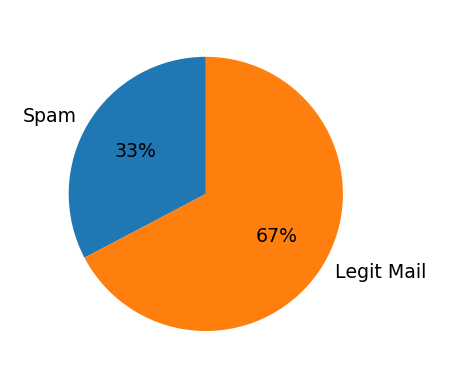

In [27]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, autopct='%1.0f%%')
plt.show()

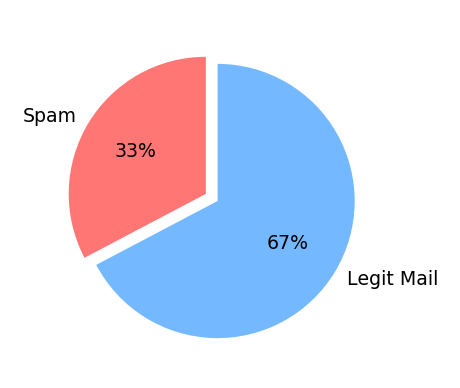

In [28]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.1])
plt.show()

### Donut Chart 

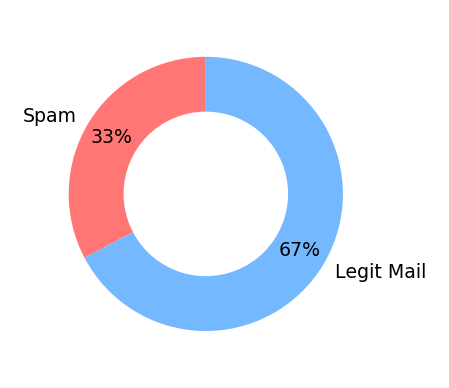

In [29]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

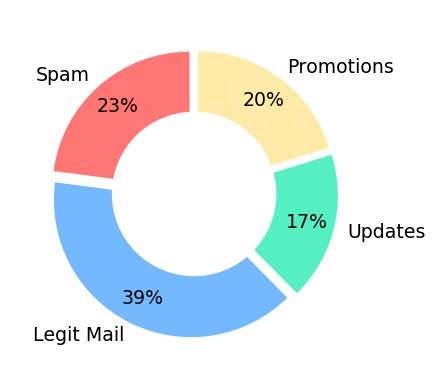

In [30]:
category_names = ['Spam', 'Legit Mail', 'Updates', 'Promotions']
sizes = [25, 43, 19, 22]
custom_colours = ['#ff7675', '#74b9ff', '#55efc4', '#ffeaa7']
offset = [0.05, 0.05, 0.05, 0.05]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8, explode=offset)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()